# Użycie metody Monte Carlo do symulacji ruchów Browna


30-06-2020 Tomasz Solga - 108138
---

### Program wykorzystujący generator liczb pseudolosowych do symulacji ruchów Browna
1. [Pobranie liczby n ruchów cząsteczki](#input)  
2. [Algorytm](#algorithm)
3. [Długość wektora przesunięcia cząsteczki po *n* krokach](#vector)
4. [Graficzna reprezentacja trajektorii przemieszczenia cząsteczki](#chart)
5. [Wymagane zależności](#required)

<a name = "intro"></a>
Metody Monte carlo to ogólna nazwa metod rozwiązywania problemów występujących w różnych dziedzinach, np. fizyka, matematyka, ekonomia, wykorzystując generator liczb pseudolosowych.
Problem będzie rozwiązywany w języku python następująco: cząsteczka startuje w punkcie (0, 0) i w tym punkcie tworzymy arkusz z danymi. Kolejnym krokiem jest losowanie kąta kierunku przemieszczenia cząsteczki - obliczanie za pomocą generatora liczb pseudolosowych z przedziału <0; 2π> i przemieszczenie jej w tym kierunku. Nowy punkt zostaje dopisany do arkusza z danymi. Pętla jest powtarzana *n* razy, gdzie *n* to ilość ruchów cząsteczki. Po *n* ruchach wyznaczamy położenie cząsteczki po *n* krokach, oraz wyznaczamy długość wektora przesunięcia cząsteczki po *n* krokach
$$\vec{\mathbf{|S|}}=\sqrt({x_n^2}+{y_n^2})$$ <br>
Następnie dla wyznaczenia współrzędnych: <br>
$$x_k = x_{k-1} + r * cos⁡φ $$ <br>
$$y_k = y_{k-1} + r * cos⁡φ $$ <br>
gdzie k = 0, 1, 2, ..., n; r = 1(długość jednego kroku); φ kąt kierunku ruchu cząsteczki.


<br><br>
# Program
<br>
- Wczytanie bibliotek wymaganych do poprawnego działania programu.

In [1]:
import math
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
import xlsxwriter
import watermark

- Wstępna inicjalizacja zmiennych oraz stałych.

In [2]:
variableInitialization = lambda counter: [0 for _ in range(counter)]
x, y, s, fi = variableInitialization(4)
PI = 3.14159
i = 3

<a name = "input"></a>
## 1. Pobranie liczby ruchów cząsteczki

In [3]:
n = int(input("Ilość ruchów? "))

Ilość ruchów? 5142


- Stworzenie pliku danych `test.xlsx` 
- Inicjacja wyjściowych współrzędnych (0, 0)

In [4]:
workbook = xlsxwriter.Workbook('test.xlsx')
worksheet = workbook.add_worksheet()
worksheet.write('A' + str(1), 'x')
worksheet.write('B' + str(1), 'y')
worksheet.write('A' + str(2), 0)
worksheet.write('B' + str(2), 0)

0

<a name = "algorithm"></a>
## 2. Algorytm
- działanie algorytmu zostało szczegółowo opisane we [wstępie](#intro)

In [5]:
while i <= n+1:
    fi = uniform(0, 32767) / (32767 + 1) * 2 * PI
    # 0-32767 / ( 32767 + 1) * 2 * PI
    x += math.cos(fi)
    y += math.sin(fi)

    print(fi)
    print(x)
    print(y)

    worksheet.write('A' + str(i), x)
    worksheet.write('B' + str(i), y)
    i += 1


0.35975600141953973
0.9359827502304815
0.35204586529454385
2.9304542102086533
-0.04181021096167259
0.5616190626339908
2.251540977907893
-0.6711820809825653
1.3387233344189324
3.9594531455201847
-1.3549660180481051
0.6090387947641924
5.019415902920906
-1.0527400871427102
-0.3441975278171323
6.136917920963034
-0.06341810364074307
-0.4899439272914708
1.6237670133853472
-0.116364022020881
0.5086534539022132
5.972144552333358
0.8356515408980468
0.20260383707488072
5.325221025784471
1.4108379809591485
-0.6154185093007161
3.2030454131330752
0.412725607632039
-0.6768325973532545
2.759697916419441
-0.5152345645983778
-0.3041532193966857
2.2374754668422727
-1.1336141702910083
0.4817263281571533
2.970102867333449
-2.1189457980210435
0.6523767995742552
4.9365454960228075
-1.8966617387434448
-0.3226051474335204
2.8261850397499106
-2.847331753192546
-0.012401144191548696
5.863982434585646
-1.933918065976285
-0.4194336195617506
5.379638577273927
-1.315090250560043
-1.2049602803869335
3.40574055480924

4.299316214290164
-20.58219489459285
-1.612315789673334
3.1727637917415525
-21.58170911400157
-1.6434818802169704
2.3951901711464236
-22.315845450190327
-0.9644797889923953
4.296859618162935
-22.71951975207009
-1.8793825477607164
3.6104613649569797
-23.61159981474203
-2.3312599224800468
0.9187005030294392
-23.004746288016406
-1.5364462354434707
4.911140848874462
-22.807300363628393
-2.516760015282642
6.1406993954454
-21.817434318570207
-2.658764285784848
3.200506649146544
-22.81569939102846
-2.7176442068948177
6.192896681844099
-21.819772640726235
-2.8078102095368855
5.162306233250076
-21.384881617521636
-3.7082933009584043
4.558065623412483
-21.53859315040898
-4.696409065764039
2.0360244554798133
-21.98721984652259
-3.802689821518854
5.87625696966545
-21.068878958876795
-4.198480187846709
3.419966523840378
-22.030382516472873
-4.4732726708772415
3.750303758222795
-22.850768219508584
-5.045083214899123
0.690037539162926
-22.079546100127878
-4.40851708119585
5.2849137559891215
-21.53779

-24.871857258730785
-20.046187864551836
0.4891711136001644
-23.98913460787177
-19.576293491675937
1.7919506089011459
-24.208490546284814
-18.600648590965164
3.6407113171288157
-25.08649530249514
-19.079300497962354
4.580850850956736
-25.21765444169489
-20.07066182472691
2.010434461334337
-25.643266480503065
-19.165756087966695
0.10985504122599418
-24.649294479661545
-19.05612187093978
2.6653843034168787
-25.538033927194885
-18.59770918089059
6.0361576545251125
-24.568390416159687
-18.842232107233563
4.239591996294838
-25.02376862911371
-19.732530193925207
2.7645378044449567
-25.95352165227318
-19.364346386668796
3.6433601737872316
-26.830255449442515
-19.8453223204753
0.7284100277508985
-26.084021685235587
-19.179638334519833
3.3228787398378925
-27.0676343169674
-19.35993306738139
0.8726345663857128
-26.424823680572953
-18.593907946554296
4.463100290764997
-26.67153837983387
-19.562996104137802
5.227986926772037
-26.17848323048996
-20.43299416143762
3.4350741264298814
-27.1357257658435

3.431130879128599
-46.81704702847566
-43.20249848749076
0.3907703312098622
-45.89243111401639
-42.8215976989268
2.469983707920972
-46.675252633072304
-42.199351389734865
1.27848368507474
-46.38708509985873
-41.24177138117078
3.659939445352048
-47.25572453958232
-41.73721615484055
0.1755990532121818
-46.27110247740205
-41.56251814492662
2.4920007983304946
-47.06743321328623
-40.957656707003714
4.6019978614380594
-47.17760026077891
-41.95156979256338
1.4116078295990784
-47.01908324424401
-40.96421354709325
5.442249564085796
-46.35231750517812
-41.709480914692236
4.908732437012751
-46.157233150480295
-42.69026738205
0.25830984962961107
-45.190410048061125
-42.43482054094882
1.24739108297777
-44.8726129394592
-41.48666180014417
2.222701973088587
-45.47931529955403
-40.69173271761204
0.5251722806328005
-44.61407772006595
-40.1903706418209
0.263891075912964
-43.64869537514124
-39.929531748809026
1.6397104546730297
-43.717554968634886
-38.93190538769787
5.313813432921405
-43.15173741707518
-3

-55.371354192750296
2.567226705509137
-62.71658060710216
-54.828051602837775
2.374437475559868
-63.436468749835
-54.13396150641465
0.1576037594331617
-62.44886253638779
-53.97700938900149
2.1679496122080804
-63.01115323015338
-53.150069744465924
1.1376660969928318
-62.59143920301094
-52.2424133472429
6.24348393915054
-61.592227198811315
-52.2821042865536
3.551768114822251
-62.509278067026784
-52.680874527551154
3.178857539168747
-63.50858381152484
-52.71813078894695
5.414458093500784
-62.862784959436155
-53.48163838068455
3.456153547183215
-63.813717289079584
-53.791037321275695
1.0384272674194555
-63.306141327244845
-52.92943030936856
4.701651281956966
-63.31687881933426
-53.9293726608387
5.223765408163664
-62.82750076548526
-54.801444401242534
2.5260044794973084
-63.64393471906953
-54.224005573802984
1.8189222831027074
-63.889522460728564
-53.25463120796344
1.9614494077985483
-64.2703148352679
-52.329970639163896
1.546014276887948
-64.24553532193237
-51.33027769844717
2.4141898801014

0.4398154471840197
-59.35515787558298
-71.50903995212478
4.416067014081746
-59.64716233148124
-72.4654569102218
1.971927997963711
-60.037622762378994
-71.54483719942742
4.661300127092289
-60.08868939431642
-72.54353244779028
0.10747538289600922
-59.09445931606128
-72.43626385269931
0.41526297726018724
-58.17944905699203
-72.03283328147545
4.163256397841914
-58.701396594723946
-72.88581087077988
5.177803661863025
-58.252603180596296
-73.77944640691061
1.67980649025905
-58.36139757375426
-72.78538213332595
6.131437146895456
-57.37288924836693
-72.93654856690146
5.7740341252343335
-56.49973068151261
-73.42398483671414
0.4573873251529158
-55.60252135151092
-72.9823793361167
6.198511405567161
-54.60610404498977
-73.0669520933446
2.6100491261558316
-55.46812978342467
-72.56008758849566
5.122499053510017
-55.06941950749998
-73.47716452958188
0.6134502734158551
-54.25175291379991
-72.90147247514051
4.933654804220947
-54.03228815163156
-73.8770929024412
6.022756437982501
-53.06600851629701
-74.

-76.39551516201793
3.6832045115901404
-60.162278867886194
-76.91103298978776
3.0848480762565047
-61.16066932631392
-76.85431885997454
2.5076819678921938
-61.96638670175858
-76.26201867349258
5.267144631475711
-61.43965108952948
-77.11204784640938
2.5592668800799623
-62.27483689873356
-76.56207997088926
0.258010973699531
-61.30793749258493
-76.30692210134686
3.697344849414724
-62.15744132790554
-76.83450454398077
1.0864433949984145
-61.691805511047015
-75.94952811149317
3.0299891429319414
-62.68558430055099
-75.838156133276
0.9496690078928937
-62.10363200884351
-75.02493320555175
5.677882869416295
-61.28130196395526
-75.59394401148963
3.847942560644455
-62.04203803662199
-76.2430053550802
2.6955146219155077
-62.94418413039312
-75.8115746822097
4.076015951892683
-63.5384664716478
-76.61583117044765
6.273219369437671
-62.53851613119432
-76.62579694322103
4.4585529464069396
-62.78963504201271
-77.59375318842501
2.6554809603095024
-63.67379116385958
-77.1265616300673
4.897645652843351
-63.4

-52.13111311976968
-84.75804050815856
2.96550835722324
-53.11565029501987
-84.58286473771534
3.5463722356074876
-54.03483951867822
-84.97668090182033
5.103414356215043
-53.653702924190185
-85.90119963951149
1.0189434597158753
-53.12943697876517
-85.0496450502645
2.12090115362682
-53.652213572268636
-84.19717532453524
3.25372094577379
-54.64593377897742
-84.3090688041426
5.859270744896084
-53.734448034264965
-84.72040046738526
0.02117993324774024
-52.73467232066659
-84.6992221176182
1.9983335591217153
-53.149303289687495
-83.78923246958435
1.871115757608493
-53.44512864517877
-82.83399042745657
1.3882509932091134
-53.26359544400374
-81.85060561118618
1.791471402256853
-53.48248382172945
-80.87485570567934
0.5316437894493506
-52.620508906884
-80.36790477494031
5.813624098266925
-51.72874198205966
-80.8203998045145
3.9934373638830065
-52.38733811108771
-81.5728964083801
5.252531034264949
-51.87308028377614
-82.4305320460776
1.1500453285510401
-51.46463421757848
-81.51774959061099
5.481651

-45.87079057733004
-119.40894070931827
0.8267342301293183
-45.193508506361205
-118.67321725832315
5.24096022666629
-44.68920841952913
-119.53674573059327
2.60000661265766
-45.54610058171344
-119.02125002509506
5.42669879929554
-44.891004472202205
-119.77679558116911
3.3183397555420453
-45.87542532372265
-119.95262386982529
4.210426708830809
-46.35657199350307
-120.82926397965328
0.8862121530473431
-45.724221060445785
-120.05458191747448
4.4005116399238355
-46.03106701260675
-121.00634111057032
0.02689098294831729
-45.03142855330133
-120.97945336842834
0.33676612083932544
-44.0876003623429
-120.64901676943826
3.221624873990527
-45.08439949324464
-120.72896358071638
2.7715456251109782
-46.016709831595996
-120.3673043032145
2.8906915230362253
-46.985398916674065
-120.1190273279417
0.979992079839639
-46.428369792252965
-119.28853436918367
3.138867846534
-47.42836607996852
-119.28580956549962
4.321283384462685
-47.80957683820799
-120.21029772540352
0.503175545111048
-46.933521135989736
-119

4.1018873415565125
-33.420655473133266
-107.47847768490813
3.039338454031798
-34.415432066144405
-107.37640158585872
1.8674411898773822
-34.707745330770436
-106.42007896491761
3.265979928020774
-35.70001920314026
-106.54414573005717
5.848241133802422
-34.79312563633458
-106.96550550327534
5.405755531597005
-34.1539956269572
-107.73460421677919
2.5037457735955795
-34.957375358072674
-107.13913716678161
0.26152004575005405
-33.99137727042869
-106.88058795547325
3.560554067838172
-34.90488921240511
-107.28739986762243
4.045612365859361
-35.52334541835855
-108.07321913521369
1.2792949552183341
-35.23595483596087
-107.11540566007925
5.507804031655351
-34.52180063843998
-107.81539407581431
0.3909594951254856
-33.59725679320766
-107.43431839009945
5.311393895665263
-33.03343587808855
-108.26021546339263
1.8730074459145087
-33.33106772339951
-107.30553473945567
3.3682574723469587
-34.30548904810367
-107.53026364716845
2.9946352715992206
-35.29471023170869
-107.38383465445503
5.034885562862715


-106.59023398755365
1.6931856396527396
-45.9077746538398
-105.59771421522328
1.237175440881887
-45.580308245767085
-104.65285139365395
0.23155054391888458
-44.60699651022037
-104.42336443226608
2.6270812205658696
-45.477529764902236
-103.93125483828015


<a name = "vector"></a>
## 3. Obliczenie wektora przesunięcia cząsteczki po *n* krokach
- wyznaczanie długości wektora przesunięcia cząsteczki po *n* krokach

In [10]:
s = math.sqrt(x*x + y*y)
print("\n\n\nCzasteczka po " + str(n) + " krokach przemiescila sie o odleglosc " + str(s) + "\n\n\n")




Czasteczka po 5142 krokach przemiescila sie o odleglosc 113.44563211414136





In [7]:
workbook.close()

<a name = "chart"></a>
## 4. Graficzna reprezentacja trajektorii przemieszczenia cząsteczki
- wykorzystanie biblioteki matplotolib do wizualizacji arkusza danych<br>
df - data frame

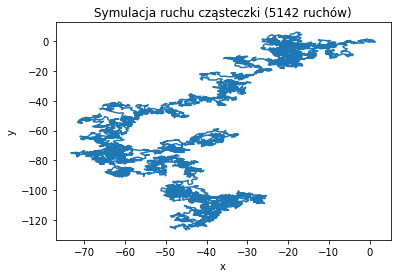

In [8]:
df = pd.read_excel('test.xlsx', 'Sheet1')
plt.plot(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Symulacja ruchu cząsteczki ' + '(' + str(n) + ' ruchów)')
plt.show()

<a name = "required"></a>
## 5. Wymagane zależności


In [9]:
%load_ext watermark
%watermark -v -m -p pandas,matplotlib,xlsxwriter,xlrd,watermark

CPython 3.8.3
IPython 7.15.0

pandas 1.0.5
matplotlib 3.2.2
xlsxwriter 1.2.9
xlrd 1.2.0
watermark 2.0.2

compiler   : MSC v.1924 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
